<h1><Center>My Coursera Capstone Project</Center></h1>

In [1]:
import pandas as pd
import numpy as np
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [2]:
!wget -O seattle-data-collision.csv https://amapplied-data-science-capstone.s3.us-east.cloud-object-storage.appdomain.cloud/Data-Collisions.csv

--2020-08-16 23:37:07--  https://amapplied-data-science-capstone.s3.us-east.cloud-object-storage.appdomain.cloud/Data-Collisions.csv
Resolving amapplied-data-science-capstone.s3.us-east.cloud-object-storage.appdomain.cloud (amapplied-data-science-capstone.s3.us-east.cloud-object-storage.appdomain.cloud)... 169.63.118.98
Connecting to amapplied-data-science-capstone.s3.us-east.cloud-object-storage.appdomain.cloud (amapplied-data-science-capstone.s3.us-east.cloud-object-storage.appdomain.cloud)|169.63.118.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘seattle-data-collision.csv’

100%[======================================>] 73,917,638  6.61MB/s   in 9.8s   

2020-08-16 23:37:18 (7.16 MB/s) - ‘seattle-data-collision.csv’ saved [73917638/73917638]



In [3]:
df = pd.read_csv('seattle-data-collision.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [5]:
df.shape

(194673, 38)

In [6]:
df['SEVERITYDESC'].value_counts()
#unbalanced data set

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

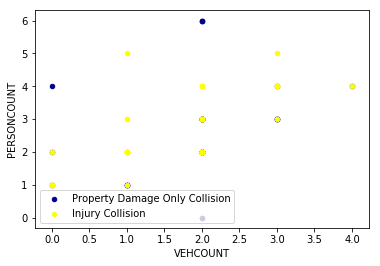

In [10]:
import matplotlib.pyplot as plt
ax = df[df['SEVERITYCODE'] == 1][0:50].plot(kind='scatter', x='VEHCOUNT', y='PERSONCOUNT', color='DarkBlue', label='Property Damage Only Collision');
df[df['SEVERITYCODE'] == 2][0:50].plot(kind='scatter', x='VEHCOUNT', y='PERSONCOUNT', color='Yellow', label='Injury Collision', ax=ax);
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f34b217fa58>]],
      dtype=object)

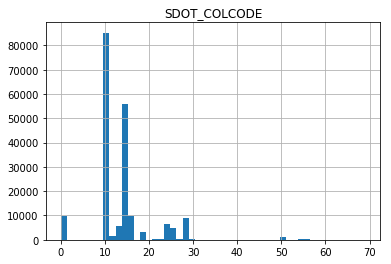

In [11]:
df.hist(column='SDOT_COLCODE', bins=50)

In [9]:
X = df[['VEHCOUNT','PERSONCOUNT','SDOT_COLCODE','INCKEY','SEGLANEKEY']].values
X[0:5]


array([[    2,     2,    11,  1307,     0],
       [    2,     2,    16, 52200,     0],
       [    3,     4,    14, 26700,     0],
       [    3,     3,    11,  1144,     0],
       [    2,     2,    11, 17700,     0]])

In [16]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)

print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 5) (155738,)
Test set: (38935, 5) (38935,)


In [18]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.12553783, -0.33020207, -0.41751024, -1.61350238, -0.08124849],
       [ 0.12553783, -0.33020207,  0.31042563, -1.02605526, -0.08124849],
       [ 1.7102107 ,  1.15576451,  0.01925128, -1.32039636, -0.08124849],
       [ 1.7102107 ,  0.41278122, -0.41751024, -1.61538386, -0.08124849],
       [ 0.12553783, -0.33020207, -0.41751024, -1.42428146, -0.08124849]])

In [19]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [20]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 1, 2, 1])

In [21]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8003634308903415
Test set Accuracy:  0.7374598690124566


In [22]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67078464, 0.72615898, 0.70574034, 0.73745987, 0.72361628,
       0.74267369, 0.73273404, 0.74470271, 0.73663799])

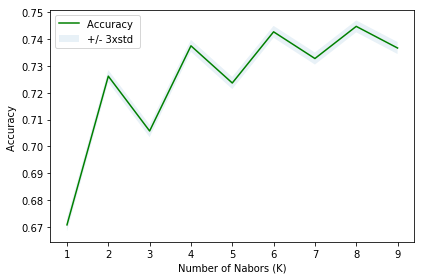

In [23]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [24]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.744702709644279 with k= 8


In [27]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
yhat = neigh.predict(X)
print("KNN Jaccard index: %.2f" %jaccard_similarity_score(y, yhat))
print("KNN f1_score: %.2f" %f1_score(y, yhat, average='weighted') )

KNN Jaccard index: 0.77
KNN f1_score: 0.75
